<a href="https://colab.research.google.com/github/kxrrym03/Market-Trends/blob/main/Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Market_Trend_External.csv to Market_Trend_External.csv


In [3]:
df = pd.read_csv('Market_Trend_External.csv')

In [4]:
df.head()

,Date,Open_Price,Close_Price,High_Price,Low_Price,Volume,Daily_Return_Pct,Volatility_Range,VIX_Close,Economic_News_Flag,Sentiment_Score,Federal_Rate_Change_Flag,GeoPolitical_Risk_Score,Currency_Index
0,1902-09-08,100.00,100.50,100.63,99.35,2334489,0.0000,1.28,31.44,0,-0.413,0,61.60,98.88
1,1902-09-09,100.50,102.02,102.30,99.49,10626850,1.5124,2.81,27.99,1,-0.384,1,69.49,93.43
2,1902-09-10,102.02,101.55,102.56,101.09,9884633,-0.4607,1.47,21.27,1,0.591,0,67.41,84.25
3,1902-09-11,101.55,101.08,104.16,100.13,9405648,-0.4628,4.03,48.86,1,0.599,1,50.91,87.78
4,1902-09-12,101.08,98.65,101.69,98.39,5247581,-2.4040,3.30,15.78,1,-0.081,1,23.00,82.11


In [5]:
df.tail()

,Date,Open_Price,Close_Price,High_Price,Low_Price,Volume,Daily_Return_Pct,Volatility_Range,VIX_Close,Economic_News_Flag,Sentiment_Score,Federal_Rate_Change_Flag,GeoPolitical_Risk_Score,Currency_Index
29995,2017-08-28,22.17,22.47,22.71,21.76,9333163,1.3532,0.95,48.94,0,-0.797,1,51.18,104.33
29996,2017-08-29,22.47,21.93,23.83,20.48,8325224,-2.4032,3.35,40.83,0,-0.856,1,39.59,80.82
29997,2017-08-30,21.93,22.62,22.83,20.66,18256968,3.1464,2.17,27.59,0,0.770,1,33.10,111.91
29998,2017-08-31,22.62,24.85,25.62,22.31,8548524,9.8585,3.31,26.64,0,0.047,0,97.02,89.47
29999,2017-09-01,24.85,26.73,27.91,24.66,8510090,7.5654,3.25,41.60,0,-0.637,1,32.56,96.15


In [6]:
df.isnull().sum()

,0
Date,0
Open_Price,0
Close_Price,0
High_Price,0
Low_Price,0
Volume,0
Daily_Return_Pct,0
Volatility_Range,0
VIX_Close,0
Economic_News_Flag,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      30000 non-null  object 
 1   Open_Price                30000 non-null  float64
 2   Close_Price               30000 non-null  float64
 3   High_Price                30000 non-null  float64
 4   Low_Price                 30000 non-null  float64
 5   Volume                    30000 non-null  int64  
 6   Daily_Return_Pct          30000 non-null  float64
 7   Volatility_Range          30000 non-null  float64
 8   VIX_Close                 30000 non-null  float64
 9   Economic_News_Flag        30000 non-null  int64  
 10  Sentiment_Score           30000 non-null  float64
 11  Federal_Rate_Change_Flag  30000 non-null  int64  
 12  GeoPolitical_Risk_Score   30000 non-null  float64
 13  Currency_Index            30000 non-null  float64
dtypes: flo

In [9]:
df.describe()

,Open_Price,Close_Price,High_Price,Low_Price,Volume,Daily_Return_Pct,Volatility_Range,VIX_Close,Economic_News_Flag,Sentiment_Score,Federal_Rate_Change_Flag,GeoPolitical_Risk_Score,Currency_Index
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,43.087641,43.085199,44.279328,41.904632,1.004296e+07,0.504709,2.380822,30.130952,0.501933,-0.002085,0.498900,49.969551,100.097362
std,29.359355,29.357668,29.367896,29.353710,5.727237e+06,11.266414,1.043352,11.539074,0.500005,0.579122,0.500007,28.860493,11.558390
min,1.000000,1.000000,1.020000,0.000000,1.016990e+05,-70.414200,0.070000,10.000000,0.000000,-1.000000,0.000000,0.000000,80.000000
25%,18.677500,18.677500,19.900000,17.440000,5.076650e+06,-1.765950,1.620000,20.140000,0.000000,-0.509000,0.000000,25.010000,90.130000
50%,38.580000,38.570000,39.770000,37.395000,1.004389e+07,0.000000,2.270000,30.140000,1.000000,0.002000,0.000000,49.835000,100.180000
75%,63.750000,63.742500,64.945000,62.530000,1.497032e+07,1.784200,3.030000,40.092500,1.000000,0.501000,1.000000,74.822500,110.160000
max,130.610000,130.610000,132.090000,130.140000,1.999982e+07,277.000000,7.960000,50.000000,1.000000,1.000000,1.000000,99.990000,120.000000


<Axes: >

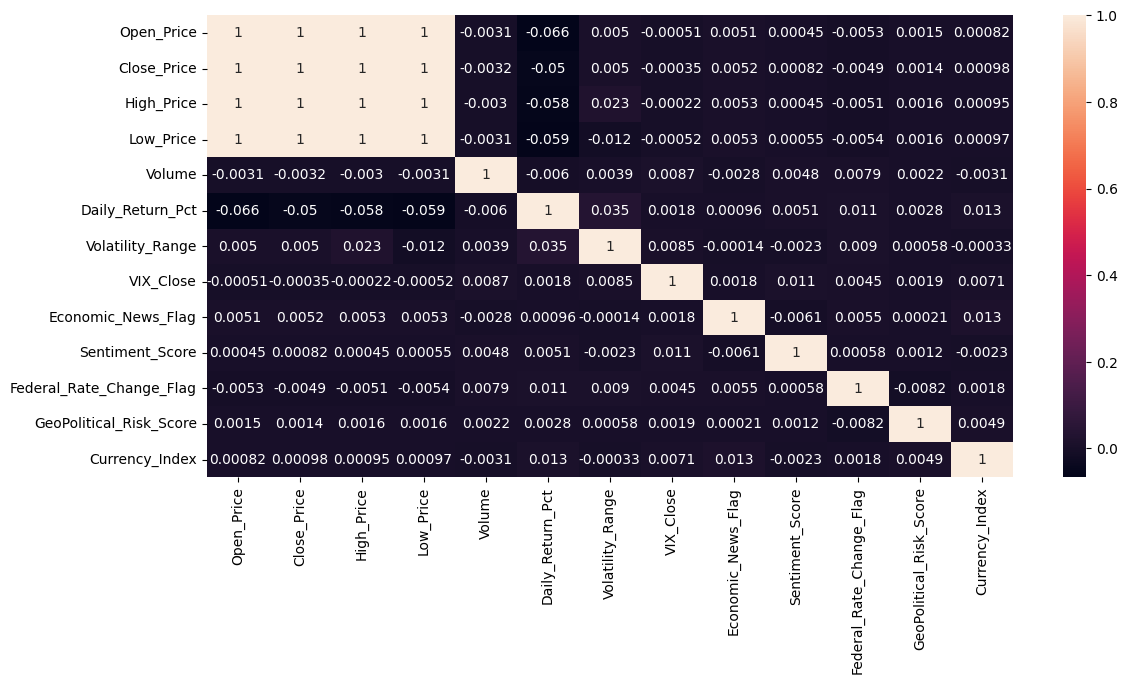

In [10]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

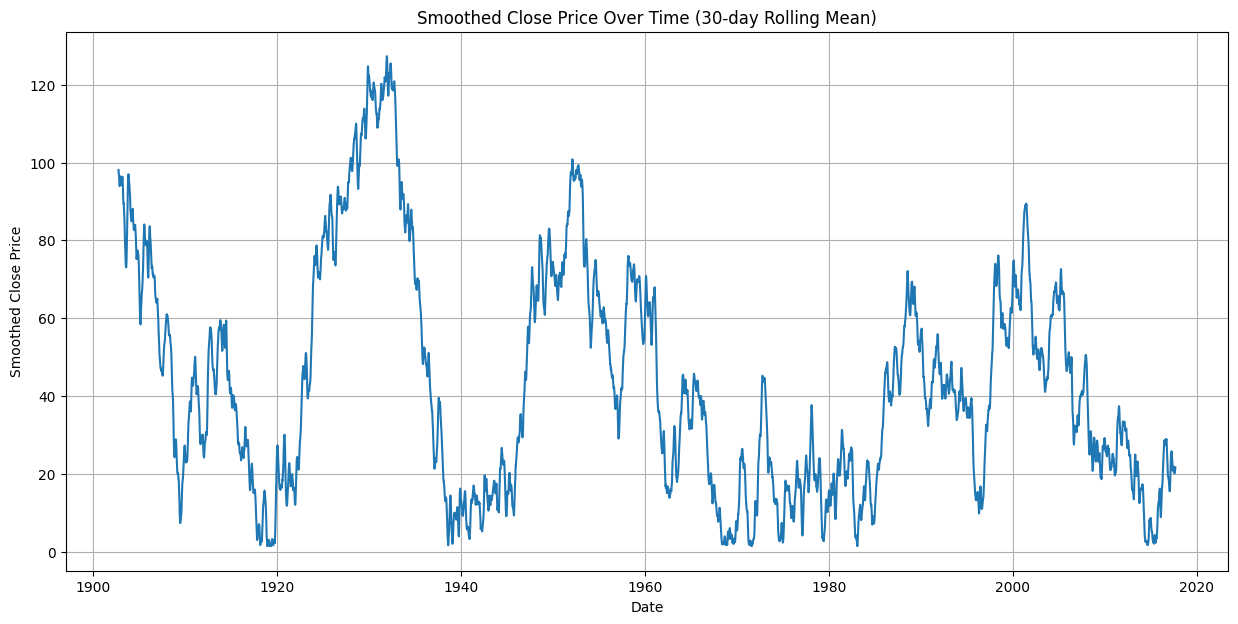

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Close_Price_SMA'] = df['Close_Price'].rolling(window=30).mean()

plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='Close_Price_SMA', data=df)
plt.title('Smoothed Close Price Over Time (30-day Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Smoothed Close Price')
plt.grid(True)
plt.show()